In [2]:
# Import The Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics Library
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

print('The Laboratory is Ready!')

The Laboratory is Ready!


In [3]:
# 1. Load The Data
control_df = pd.read_csv('control_group.csv', sep=';')
test_df = pd.read_csv('test_group.csv', sep=';')

# 2. Lets Control The Column Names
control_df.columns = [col.strip() for col in control_df.columns]
test_df.columns = [col.strip() for col in test_df.columns]

# 3. Quick Look At The Data
print('--- Control Group (Maximum Bidding) ---')
print(control_df.head())
print('\n--- Test Group (Average Bidding) ---')
print(test_df.head())

# 4. Critical Question: What says the raw averages?
control_purchase_mean = control_df['# of Purchase'].mean()
test_purchase_mean = test_df['# of Purchase'].mean()

print(f'\n--- Average Purchase Amounts ---')
print(f'Control Group (The Newest): {control_purchase_mean:.4f}')
print(f'Test Group (The Oldest): {test_purchase_mean:.4f}')

# Calculate the difference in means
diff = test_purchase_mean - control_purchase_mean
print(f'Difference in Average Purchase Amounts (Test - Control): {diff:.4f}')

--- Control Group (Maximum Bidding) ---
      Campaign Name       Date  Spend [USD]  # of Impressions        Reach  \
0  Control Campaign  1.08.2019         2280       82702.00000  56930.00000   
1  Control Campaign  2.08.2019         1757      121040.00000 102513.00000   
2  Control Campaign  3.08.2019         2343      131711.00000 110862.00000   
3  Control Campaign  4.08.2019         1940       72878.00000  61235.00000   
4  Control Campaign  5.08.2019         1835               NaN          NaN   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0           7016.00000     2290.00000         2159.00000        1819.00000   
1           8110.00000     2033.00000         1841.00000        1219.00000   
2           6508.00000     1737.00000         1549.00000        1134.00000   
3           3065.00000     1042.00000          982.00000        1183.00000   
4                  NaN            NaN                NaN               NaN   

   # of Purchase  
0  

In [4]:
from scipy.stats import shapiro, mannwhitneyu

# Lets Test Without Missing Values
test_stat_control, p_value_control = shapiro(control_df['# of Purchase'].dropna())
test_stat_test, p_value_test = shapiro(test_df['# of Purchase'].dropna())

print(f'Control Group P-Value: {p_value_control:.4f}')
print(f'Test Group P-Value: {p_value_test:.4f}')

# Comment on Normality Test Results
if p_value_control > 0.05 and p_value_test > 0.05:
    print('\nThere is a Normal Distribution because the p-values are greater than 0.05. -> Let\'s do a T-Test!')
else:
    print('\nThere is NOT a Normal Distribution because at least one p-value is less than 0.05. -> Let\'s do a Mann-Whitney U Test!')

Control Group P-Value: 0.0896
Test Group P-Value: 0.0241

There is NOT a Normal Distribution because at least one p-value is less than 0.05. -> Let's do a Mann-Whitney U Test!


In [19]:
# Mann-Whitney U Test
test_stat, p_value = mannwhitneyu(control_df['# of Purchase'].dropna(),
                                  test_df['# of Purchase'].dropna())

print(f'Test Statistic: {test_stat:.4f}')
print(f'P-Value: {p_value:.4f}')

# Comment on Mann-Whitney U Test Results
print('\n--- Mann-Whitney U Test Result ---')
if p_value < 0.05:
    print('Reject the Null Hypothesis: There is a significant difference between the two groups.')
    print('Comment: The bidding strategy affects purchase amounts significantly.')
else:
    print('Fail to Reject the Null Hypothesis: There is no significant difference between the two groups.')
    print('Comment: The bidding strategy does not affect purchase amounts significantly.')

Test Statistic: 439.0000
P-Value: 0.9577

--- Mann-Whitney U Test Result ---
Fail to Reject the Null Hypothesis: There is no significant difference between the two groups.
Comment: The bidding strategy does not affect purchase amounts significantly.


In [5]:
# --- Cost Analysis ---

# 1. Lets Look At The Average Costs
control_spend_mean = control_df['Spend [USD]'].mean()
test_spend_mean = test_df['Spend [USD]'].mean()

print(f'Control Group Average Spend (The Oldest): {control_spend_mean:.2f}')
print(f'Test Group Average Spend (The Newest): {test_spend_mean:.2f}')

# 2. Statistical Testing For Spend [USD]
# Normality Test
# Mann-Whitney U Test
stat, p_value_spend = mannwhitneyu(control_df['Spend [USD]'].dropna(),
                                   test_df['Spend [USD]'].dropna())

print(f'\nDifference of Spend Amounts P-Value: {p_value_spend:.4f}')

if p_value_spend < 0.05:
    print('Result: There is a significant difference in spend amounts between the two groups.')
else:
    print('Result: There is no significant difference in spend amounts between the two groups.')

Control Group Average Spend (The Oldest): 2288.43
Test Group Average Spend (The Newest): 2563.07

Difference of Spend Amounts P-Value: 0.0044
Result: There is a significant difference in spend amounts between the two groups.


/var/folders/7p/nl9d4nq16fg4xqbkr9j_b7grytpd5m/T/ipykernel_1276/3863607159.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Group', y = '# of Purchase', data = all_data, ax = axes[0], palette = 'Set2')
/var/folders/7p/nl9d4nq16fg4xqbkr9j_b7grytpd5m/T/ipykernel_1276/3863607159.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Group', y = 'Spend [USD]', data = all_data, ax = axes[1], palette = 'Set1')
/var/folders/7p/nl9d4nq16fg4xqbkr9j_b7grytpd5m/T/ipykernel_1276/3863607159.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot

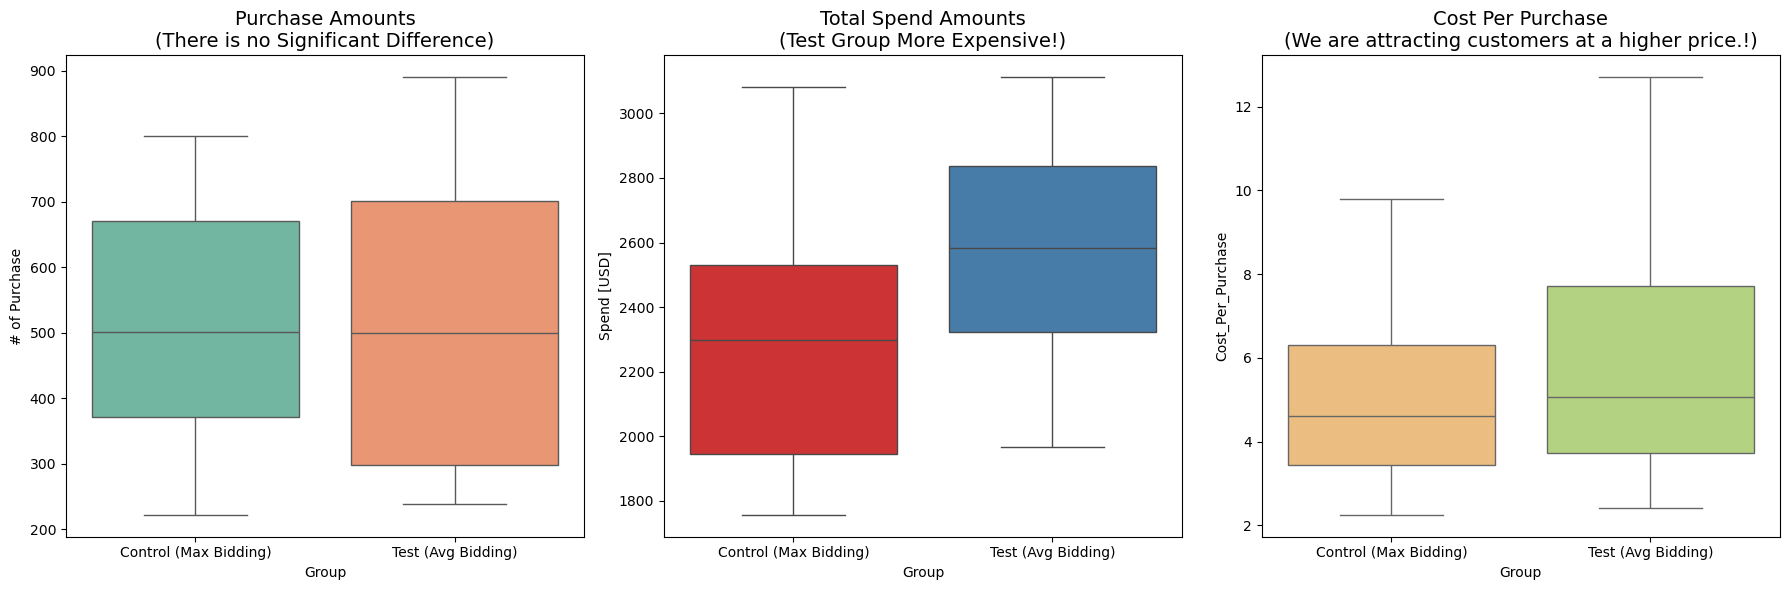


--- Summary of Findings ---
Average Unit Cost of Control Group: $5.05
Average Unit Cost of Test Group: $5.90


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate The New Metric
# Let's Calculate Conversion Rate and Cost Per Purchase for Both Groups
control_df['Conversion_Rate'] = control_df['# of Purchase'] / control_df['# of Website Clicks']
test_df['Conversion_Rate'] = test_df['# of Purchase'] / test_df['# of Website Clicks']

control_df['Cost_Per_Purchase'] = control_df['Spend [USD]'] / control_df['# of Purchase']
test_df['Cost_Per_Purchase'] = test_df['Spend [USD]'] / test_df['# of Purchase']

# Concat DataFrames for Visualization
control_df['Group'] = 'Control (Max Bidding)'
test_df['Group'] = 'Test (Avg Bidding)'

all_data = pd.concat([control_df, test_df], axis=0, ignore_index=True)

# 2. Visualization (Data Storytelling)
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

# Graph 1: Purchase Amounts
sns.boxplot(x = 'Group', y = '# of Purchase', data = all_data, ax = axes[0], palette = 'Set2')
axes[0].set_title('Purchase Amounts\n(There is no Significant Difference)', fontsize = 14)

# Graph 2: Spend Amounts
sns.boxplot(x = 'Group', y = 'Spend [USD]', data = all_data, ax = axes[1], palette = 'Set1')
axes[1].set_title('Total Spend Amounts\n(Test Group More Expensive!)', fontsize = 14)

# Graph 3: Cost Per Purchase
sns.boxplot(x = 'Group', y = 'Cost_Per_Purchase', data = all_data, ax = axes[2], palette = 'RdYlGn')
axes[2].set_title('Cost Per Purchase\n(We are attracting customers at a higher price.!)', fontsize = 14)

plt.tight_layout()
plt.show()

# 3. Summary of Findings
print('\n--- Summary of Findings ---')
print(f'Average Unit Cost of Control Group: ${control_df['Cost_Per_Purchase'].mean():.2f}')
print(f'Average Unit Cost of Test Group: ${test_df['Cost_Per_Purchase'].mean():.2f}')